# Notebook 03: Classification Model

**Student Name:** [Your Name]

**Dataset:** [Your Dataset Name]

**Original Target Variable:** [Your Original Numerical Target]

**Binned Target Variable:** [Your Categorical Target - e.g., Low/Medium/High]

**Checkpoint 4 Due:** Feb 22

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Your binning justification, model selection reasoning, and analysis of the confusion matrix demonstrate your understanding. These reflections are what employers look for—the ability to communicate technical decisions clearly.

---

## Setup

In [145]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sklearn - models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Sklearn - evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# Model saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 1: Load Processed Data

In [146]:
# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (7967, 21)


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,...,Vibe,Total Reservations,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes
0,4.0,38,73.98,2224,23406,13,1.3,7.0,13,4,...,8.3,17,True,False,False,False,False,True,False,True
1,3.2,76,28.11,4416,42741,8,2.6,3.4,48,6,...,6.0,54,False,False,False,False,False,False,True,True
2,4.7,48,48.29,2796,37285,18,5.3,6.7,27,14,...,12.0,41,True,False,False,False,True,False,False,False
3,4.4,34,51.55,1167,15214,13,4.6,2.8,9,17,...,7.4,26,True,False,False,False,True,False,False,True
4,4.9,88,75.98,3639,40171,9,8.6,2.1,37,26,...,10.7,63,False,False,False,False,False,True,False,False


In [147]:
# Define your original target variable
ORIGINAL_TARGET = 'Revenue'  # <-- UPDATE THIS

print(f"Original Target: {ORIGINAL_TARGET}")
print(f"\nTarget statistics:")
print(df[ORIGINAL_TARGET].describe())

Original Target: Revenue

Target statistics:
count    7.967000e+03
mean     6.446314e+05
std      2.628430e+05
min      1.847085e+05
25%      4.477130e+05
50%      5.926366e+05
75%      7.966647e+05
max      1.531868e+06
Name: Revenue, dtype: float64


## Section 2: Create Binned Target

Convert your regression target into classification categories.

### 2.1 Binning Strategy Justification

**Your approved binning strategy:**

- **Number of categories:** [e.g., 3]
- **Category names:** [e.g., Low, Medium, High]
- **Thresholds:** [e.g., Low: < $50,000, Medium: $50,000-$100,000, High: > $100,000]

**Why this makes sense for your problem:**

[Explain your reasoning - this should match what you submitted to Abishek on Slack]

Number of categories: 4
Category names: Low, Medium Low, Medium High and High
Thresholds:  Low: < $30,000, Medium: $30,000-$60,000, High: > $60,000]
Low: 0 Percentile to 25th Percentile, Medium Low: 25th Percentile to 50th Percentile, Medium High: 50th Percentile to 75th Percentile and then High: 75th Percentile to 100th Percentile

In [148]:
# View the distribution before binning
print("Target distribution:")
print(f"Min: {df[ORIGINAL_TARGET].min():.2f}")
print(f"25th percentile: {df[ORIGINAL_TARGET].quantile(0.25):.2f}")
print(f"Median: {df[ORIGINAL_TARGET].median():.2f}")
print(f"75th percentile: {df[ORIGINAL_TARGET].quantile(0.75):.2f}")
print(f"Max: {df[ORIGINAL_TARGET].max():.2f}")

Target distribution:
Min: 184708.52
25th percentile: 447713.02
Median: 592636.55
75th percentile: 796664.68
Max: 1531867.55


In [149]:
# TODO: Create your binned target using YOUR approved binning strategy
#
# Steps:
# 1. Define your bin edges (e.g., bins = [min-1, threshold1, threshold2, max+1])
# 2. Define your category labels (e.g., labels = ['Low', 'Medium', 'High'])
# 3. Use pd.cut() to create the binned column
#
# Example:
# bins = [df[ORIGINAL_TARGET].min()-1, 50000, 100000, df[ORIGINAL_TARGET].max()+1]
# labels = ['Low', 'Medium', 'High']
# df['target_category'] = pd.cut(df[ORIGINAL_TARGET], bins=bins, labels=labels)

# YOUR CODE HERE:
bins = [df[ORIGINAL_TARGET].min()-1, 447713.02,592636.55,796664.68, df[ORIGINAL_TARGET].max()+1]  # Define your bin edges
labels = ['Low', 'Medium Low', 'Medium High', 'High']  # Define your category names

df['target_category'] = pd.cut(df[ORIGINAL_TARGET], bins=bins, labels=labels)

print("Binned target distribution:")
print(df['target_category'].value_counts())

Binned target distribution:
target_category
Low            1992
Medium Low     1992
High           1992
Medium High    1991
Name: count, dtype: int64


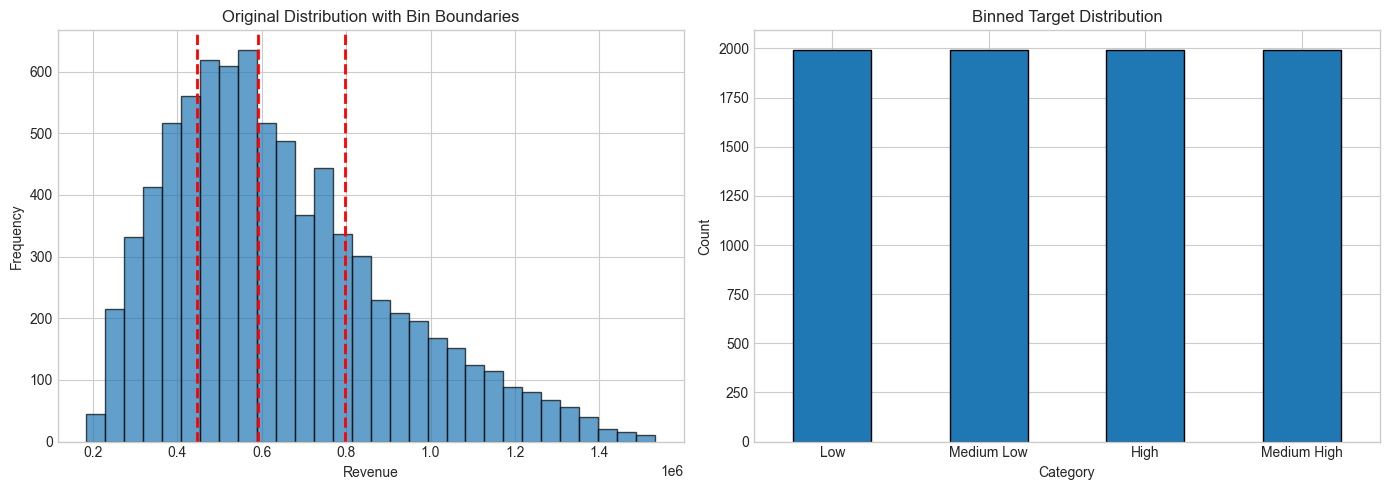

In [150]:
# Visualize the binned distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution with bin lines
axes[0].hist(df[ORIGINAL_TARGET], bins=30, edgecolor='black', alpha=0.7)
for edge in bins[1:-1]:  # Skip first and last (min/max)
    axes[0].axvline(edge, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel(ORIGINAL_TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Distribution with Bin Boundaries')

# Binned category counts
df['target_category'].value_counts().plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].set_title('Binned Target Distribution')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 2.2 Check Class Balance

*Is your binned target reasonably balanced?*

In [151]:
# Check class balance
class_counts = df['target_category'].value_counts()
class_percentages = df['target_category'].value_counts(normalize=True) * 100

print("Class Distribution:")
for cat in class_counts.index:
    print(f"{cat}: {class_counts[cat]} ({class_percentages[cat]:.1f}%)")

# Check for severe imbalance
min_class_pct = class_percentages.min()
if min_class_pct < 10:
    print(f"\nWarning: Smallest class is only {min_class_pct:.1f}% of data.")
    print("Consider adjusting your binning strategy.")
else:
    print(f"\nClass balance looks reasonable!")

Class Distribution:
Low: 1992 (25.0%)
Medium Low: 1992 (25.0%)
High: 1992 (25.0%)
Medium High: 1991 (25.0%)

Class balance looks reasonable!


## Section 3: Feature Consistency Check

**Important:** For consistency, you should use the same features for classification as you did for regression. This makes your app simpler (users enter the same inputs for both models) and allows for fair comparison.

If you decide to use different features, provide a strong justification below.

In [152]:
# Load the features you selected in the regression notebook
try:
    regression_features = joblib.load('../models/regression_features.pkl')
    print("Features from Regression Model:")
    print(regression_features)
    print(f"\nNumber of regression features: {len(regression_features)}")
except FileNotFoundError:
    print("Warning: regression_features.pkl not found!")
    print("Make sure you've completed Notebook 02 and saved your regression model first.")
    regression_features = None

Features from Regression Model:
['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']

Number of regression features: 6


### Feature Selection Decision

**Will you use the same features as your regression model?**

- [ ] **Yes, same features** (Recommended for simpler deployment)
- [ ] **No, different features** (Requires justification below)

**If using different features, justify why:**

[Write your justification here - e.g., "For classification, feature X is less predictive of categories than it was for the continuous target..."]

In [153]:
# DECIDE: Use regression features or define new ones?

# Option A: Use the same features as regression (RECOMMENDED)
if regression_features is not None:
    SELECTED_FEATURES = regression_features
    print("Using same features as regression model.")
else:
    # Option B: Define your own features (if regression not done yet)
    SELECTED_FEATURES = [
        # 'feature1',
        # 'feature2',
        # 'feature3',
        # etc.
        'Average Meal Price',
        'Seating Capacity',
        'Total Reservations',
        'Marketing Budget',
        'Social Media Followers',
        'Location_Rural',
        #'Seating Capacity'
        #'Average Meal Price'
    ]
    print("Defining features manually.")

print(f"\nSelected features for classification ({len(SELECTED_FEATURES)}):")
for i, f in enumerate(SELECTED_FEATURES, 1):
    print(f"  {i}. {f}")

Using same features as regression model.

Selected features for classification (6):
  1. Seating Capacity
  2. Average Meal Price
  3. Location_Suburban
  4. Cuisine_Italian
  5. Chef Experience Years
  6. Service Quality Score


## Section 4: Prepare Features and Target

In [154]:
# Create feature matrix using SELECTED features
X = df[SELECTED_FEATURES].copy()
y = df['target_category']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used: {X.columns.tolist()}")
print(f"\nTarget classes: {y.unique().tolist()}")

Features shape: (7967, 6)
Target shape: (7967,)

Features used: ['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']

Target classes: ['Medium High', 'Medium Low', 'Low', 'High']


### 4.1 Label Encoding

Many sklearn models require numeric targets. Use LabelEncoder to convert category names to numbers.

In [155]:
# TODO: Encode your target labels to numbers using LabelEncoder
#
# Steps:
# 1. Create a LabelEncoder instance
# 2. Fit and transform y to create y_encoded
#
# Hint: label_encoder.fit_transform(y)

# YOUR CODE HERE:
label_encoder = LabelEncoder()
label_encoder.fit(['Low', 'Medium Low', 'Medium High', 'High'])
LabelEncoder().fit_transform(y) 


array([2, 3, 3, ..., 0, 1, 3], shape=(7967,))

In [156]:
# Verify encoding (run this to check)
print("Label encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Label encoding:
High -> 0
Low -> 1
Medium High -> 2
Medium Low -> 3


## Section 5: Train-Test Split

For classification, we use **stratified** splitting to ensure each class is proportionally represented in both train and test sets.

In [157]:
# TODO: Split your data with stratification
#
# Requirements:
# - 80/20 split (test_size=0.2)
# - random_state=42 for reproducibility
# - stratify=y_encoded (THIS IS THE KEY DIFFERENCE FROM REGRESSION!)
#   This ensures each class is proportionally represented in train/test
#
# Store in: X_train, X_test, y_train, y_test

# YOUR CODE HERE:


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#X_simple = df[['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Vibe', 'Total Reservations', 'Location_Rural', 'Location_Suburban', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_Yes']]  # Double brackets = 2D array
#y = df['target_category']
#X_train, X_test, y_train, y_test = train_test_split(
#X_simple, y, test_size=0.2, random_state=42)

In [158]:
len(y_train)

6373

In [159]:
# Verify split and stratification
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print(f"\nTraining class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    #print(f"  {label_encoder.classes_[u]}: {c} ({c/len(y_train)*100:.1f}%)")
    print(u,c)
    
print(f"\nTest class distribution:")
unique, counts = np.unique(y_test, return_counts=True)
#for u, c in zip(unique, counts):
    #print(f"  {label_encoder.classes_[u]}: {c} ({c/len(y_test)*100:.1f}%)")
    #print(f"  {label_encoder.classes_[u]}: {c}")

Training set: 6373 samples
Test set: 1594 samples

Training class distribution:
High 1594
Low 1593
Medium High 1593
Medium Low 1593

Test class distribution:


## Section 6: Feature Scaling

In [160]:
# TODO: Scale your features using StandardScaler
#
# Same as regression:
# 1. Create StandardScaler instance
# 2. fit_transform on X_train
# 3. transform (only!) on X_test
#
# Store in: X_train_scaled, X_test_scaled

# YOUR CODE HERE:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [161]:
# Convert to DataFrame (helpful for later)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features scaled successfully!")
print(f"Scaler fitted on {len(SELECTED_FEATURES)} features.")

Features scaled successfully!
Scaler fitted on 6 features.


## Section 7: Baseline Model

In [162]:
# This helper function evaluates any classifier - you'll use it throughout
def evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name):
    """Train classifier and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision (weighted)': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall (weighted)': recall_score(y_test, y_test_pred, average='weighted'),
        'F1 (weighted)': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    return results, model, y_test_pred

In [163]:
# TODO: Create and evaluate a baseline Logistic Regression model
#
# Create LogisticRegression(random_state=42, max_iter=1000)
# Use evaluate_classifier() to train and evaluate

# YOUR CODE HERE:
# baseline_model = ...
# baseline_results, baseline_trained, baseline_preds = evaluate_classifier(...)


baseline_model = LogisticRegression()
baseline_results, baseline_trained, baseline_preds = evaluate_classifier(baseline_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression (Baseline)')





In [164]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Logistic Regression")
print("=" * 50)
print(f"Train Accuracy: {baseline_results['Train Accuracy']:.4f}")
print(f"Test Accuracy:  {baseline_results['Test Accuracy']:.4f}")
print(f"F1 Score:       {baseline_results['F1 (weighted)']:.4f}")

BASELINE MODEL: Logistic Regression
Train Accuracy: 0.2660
Test Accuracy:  0.2409
F1 Score:       0.2398


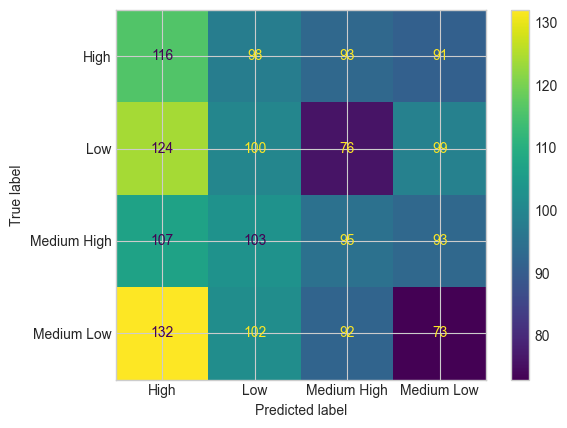

In [165]:
# TODO: Create and display the confusion matrix for baseline
#
# Steps:
# 1. Use confusion_matrix(y_test, baseline_preds) to create the matrix
# 2. Use ConfusionMatrixDisplay to visualize it
#
# Hint: ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# YOUR CODE HERE:

cm = confusion_matrix(y_test, baseline_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cm_display.plot()
plt.show() 


### Understanding the Confusion Matrix

The confusion matrix shows where your model gets predictions right and wrong:

- **Diagonal cells (top-left to bottom-right):** Correct predictions
- **Off-diagonal cells:** Misclassifications
- **Row:** What the actual class was
- **Column:** What the model predicted

**How to read it:** 
- If a row has many values spread across columns, that class is often confused with others
- If a column has many values from different rows, the model is predicting that class too often

**Example interpretation:**
- "20 Low samples were correctly predicted as Low"
- "5 Medium samples were incorrectly predicted as High"

### Baseline Interpretation

*Analyze your baseline results:*

**Questions to answer:**
- How well does the baseline perform?
- Which classes are easiest/hardest to predict (look at the diagonal)?
- Where does the model get confused (look at off-diagonal cells)?
- Is there overfitting (train vs test accuracy gap)?

**Your interpretation:**

[Write your interpretation here - be specific about which categories the model struggles with]

It especially struggled with over predicting everything as high when in reality it was in one of the other catagories. This was the main one that was struggling the most. 
T
he model predicts “High” most often 30%.

It predicts “Medium High” least often 22%.

Prehaps 4 categories was too grainular. Wider catagories might have been more appropriate. 

## Section 8: Cross-Validation

Cross-validation gives us a more robust estimate of model performance by training on different portions of the data.

In [166]:
# Cross-validation for key models
print("5-Fold Cross-Validation Results")
print("=" * 50)

models_to_cv = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
}

cv_results = []
for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results.append({
        'Model': name,
        'CV Mean Accuracy': scores.mean(),
        'CV Std': scores.std()
    })
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)
cv_df

5-Fold Cross-Validation Results
Logistic Regression: 0.2358 (+/- 0.0283)
Random Forest: 0.2507 (+/- 0.0240)
Gradient Boosting: 0.2415 (+/- 0.0362)


,Model,CV Mean Accuracy,CV Std
0,Logistic Regression,0.235839,0.014143
1,Random Forest,0.250743,0.011986
2,Gradient Boosting,0.241485,0.018116


### Cross-Validation Interpretation

*What does the cross-validation tell you?*

- Which model is most consistent (lowest std)?
- Does the ranking change from the single train/test split?

**Your interpretation:**

[Write your interpretation here]

The model is consistent and they all have low std. The random forest is the best model. But, the model is still struggling to preform. So there is another issue, but the consistency is stable. 

## Section 9: Model Iteration

In [167]:
# Store all results
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Logistic Regression (Baseline)': baseline_trained
}

### Model 2: Decision Tree

In [168]:
# TODO: Create and evaluate a Decision Tree classifier
#
# Create DecisionTreeClassifier(max_depth=10, random_state=42)
# Use evaluate_classifier() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# Create and train the 

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate
dt_accuracy = evaluate_classifier(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Decision Tree')[0]['Test Accuracy']
print(f"Decision Tree Accuracy: {dt_accuracy:.2%}")

rf_results = evaluate_classifier(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Decision Tree')[0]
all_results.append(rf_results)
trained_models['Decision Tree'] = dt_model


Decision Tree Accuracy: 24.84%


### Model 3: Random Forest

In [169]:
# TODO: Create and evaluate a Random Forest classifier
#
# Create RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Use evaluate_classifier()
# Add to all_results and trained_models

# YOUR CODE HERE:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate
rf_accuracy = evaluate_classifier(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest')[0]['Test Accuracy']
print(f"Random Forest Accuracy: {rf_accuracy:.2%}")

rf_results = evaluate_classifier(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Decision Tree')[0]
all_results.append(rf_results)
trained_models['Decision Tree'] = rf_model

# Print results
#print(f"Random Forest - Test Accuracy: {rf_results['Test Accuracy']:.4f}, F1: {rf_results['F1 (weighted)']:.4f}")

Random Forest Accuracy: 24.34%


### Model 4: K-Nearest Neighbors

In [170]:
# TODO: Create and evaluate a KNN classifier
#
# Create KNeighborsClassifier(n_neighbors=5)
# Use evaluate_classifier()
# Add to all_results and trained_models

# YOUR CODE HERE:

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate
knn_accuracy = evaluate_classifier(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 'KNN')[0]['Test Accuracy']
print(f"KNN Accuracy: {knn_accuracy:.2%}")

knn_results = evaluate_classifier(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 'KNN')[0]
all_results.append(knn_results)
trained_models['KNN'] = knn_model


# Print results
print(f"KNN - Test Accuracy: {knn_results['Test Accuracy']:.4f}, F1: {knn_results['F1 (weighted)']:.4f}")

KNN Accuracy: 23.53%
KNN - Test Accuracy: 0.2353, F1: 0.2292


### Model 5: Gradient Boosting

In [171]:
# TODO: Create and evaluate a Gradient Boosting classifier
#
# Create GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
# Use evaluate_classifier()
# Add to all_results and trained_models

# YOUR CODE HERE:

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test_scaled)

# Evaluate
gb_accuracy = evaluate_classifier(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Gradient Boosting')[0]['Test Accuracy']
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2%}")

gb_results = evaluate_classifier(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Gradient Boosting')[0]
all_results.append(gb_results)
trained_models['Gradient Boosting'] = gb_model


# Print results
print(f"Gradient Boosting - Test Accuracy: {gb_results['Test Accuracy']:.4f}, F1: {gb_results['F1 (weighted)']:.4f}")

Gradient Boosting Accuracy: 24.97%
Gradient Boosting - Test Accuracy: 0.2497, F1: 0.2483


### Add Your Own Model (Optional)

Try a different model or different hyperparameters!

In [172]:
# YOUR ADDITIONAL MODEL HERE:
# Try SVC, different hyperparameters, or another classifier

model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

svc_predictions = model_svc.predict(X_test_scaled)

svc_accuracy = evaluate_classifier(model_svc, X_train_scaled, X_test_scaled, y_train, y_test, 'SVC')[0]['Test Accuracy']
print(f"SVC Accuracy: {svc_accuracy:.2%}")

svc_results = evaluate_classifier(model_svc, X_train_scaled, X_test_scaled, y_train, y_test, 'SVC')[0]
all_results.append(svc_results)
trained_models['SVC'] = model_svc



SVC Accuracy: 23.96%


## Section 10: Model Comparison

In [173]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("Model Comparison:")
results_df

Model Comparison:


,Model,Train Accuracy,Test Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
4,Gradient Boosting,0.5016,0.2497,0.2489,0.2497,0.2483
1,Decision Tree,0.3017,0.2484,0.2738,0.2484,0.2163
2,Decision Tree,1.0000,0.2434,0.2434,0.2434,0.2429
0,Logistic Regression (Baseline),0.2660,0.2409,0.2405,0.2409,0.2398
5,SVC,0.4091,0.2396,0.2387,0.2396,0.2346
3,KNN,0.4856,0.2353,0.2353,0.2353,0.2292


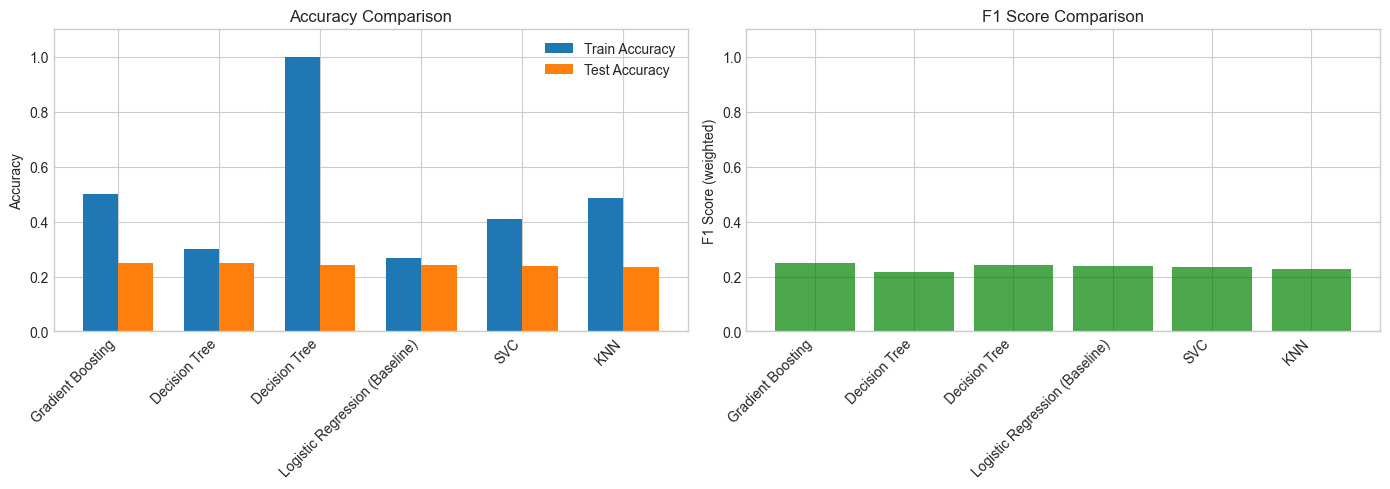

In [174]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = results_df['Model']
x = np.arange(len(models))
width = 0.35

# Accuracy comparison
axes[0].bar(x - width/2, results_df['Train Accuracy'], width, label='Train Accuracy')
axes[0].bar(x + width/2, results_df['Test Accuracy'], width, label='Test Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.1)

# F1 Score comparison
axes[1].bar(x, results_df['F1 (weighted)'], color='green', alpha=0.7)
axes[1].set_ylabel('F1 Score (weighted)')
axes[1].set_title('F1 Score Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

## Section 11: Best Model Selection

In [175]:
# Identify best model (by test accuracy)
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}")
print(f"F1 Score: {results_df.iloc[0]['F1 (weighted)']:.4f}")

Best Model: Gradient Boosting
Test Accuracy: 0.2497
F1 Score: 0.2483


### Best Model Justification

*Explain why you chose this model:*

**Questions to consider:**
- Why this model over others?
- Is there significant overfitting?
- How does it compare to baseline?
- Which metrics did you prioritize and why?

**Your justification:**

[Write your justification here]

It has the best stats. It doesn't massively stand out, all of the models struggled. 

## Section 12: Best Model Analysis

In [176]:
# Get predictions from best model
y_pred = best_model.predict(X_test_scaled)

# Detailed classification report
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

        High       0.23      0.25      0.24       398
         Low       0.26      0.30      0.28       399
 Medium High       0.28      0.27      0.28       398
  Medium Low       0.22      0.18      0.20       399

    accuracy                           0.25      1594
   macro avg       0.25      0.25      0.25      1594
weighted avg       0.25      0.25      0.25      1594



### Understanding the Classification Report

The classification report shows per-class metrics:

- **Precision:** Of all predictions for this class, what % were correct?
  - High precision = Few false positives
  - Example: "When the model predicts 'High', it's correct 85% of the time"

- **Recall:** Of all actual instances of this class, what % did we find?
  - High recall = Few false negatives
  - Example: "We correctly identified 90% of all actual 'High' cases"

- **F1-Score:** Harmonic mean of precision and recall (balanced measure)
  - Good when you need both precision and recall

- **Support:** Number of actual occurrences of each class in the test set

<Figure size 800x600 with 0 Axes>

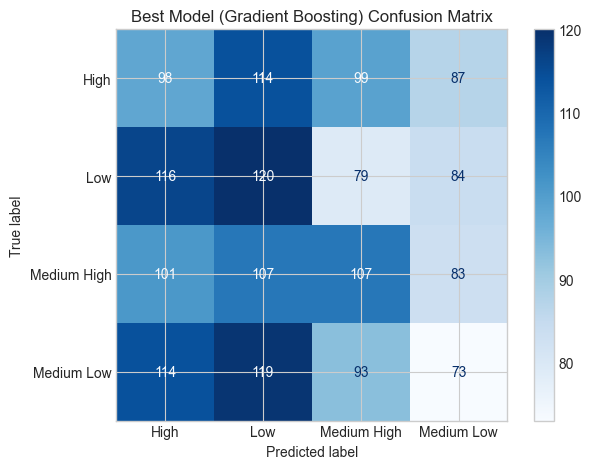

In [177]:
# Confusion matrix for best model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title(f'Best Model ({best_model_name}) Confusion Matrix')
plt.tight_layout()
plt.show()

### Detailed Confusion Matrix Analysis

*Analyze the confusion matrix carefully:*

**For each class, describe:**
1. How many correct predictions (diagonal)?
2. What are the most common misclassifications?
3. Does the confusion make sense for your problem?

**Your analysis:**

[Write your detailed analysis here - e.g., "The model most often confuses Medium with High (X cases), which makes sense because..."]

1. 398 correct predictions (diagonal)
2. Medium Low to Low: 119
3.Yes, I think it makes sense that the groups are too grainular and it is confusing the medium low and low.

In [182]:
# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance['Feature'], importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance for Classification')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 most important features:")
    for i, row in importance.tail(5).iloc[::-1].iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.4f}")
        
elif hasattr(best_model, 'coef_'):
    # For multi-class, coef_ has shape (n_classes, n_features)
    coef = best_model.coef_
    if len(coef.shape) > 1:
        # Average absolute importance across classes
        importance_vals = np.abs(coef).mean(axis=0)
    else:
        importance_vals = np.abs(coef)
    
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance_vals
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance['Feature'], importance['Importance'])
    plt.xlabel('Average Absolute Coefficient')
    plt.title('Feature Importance for Classification')
    plt.tight_layout()
    plt.show()

ValueError: All arrays must be of the same length

## Section 13: Model Iteration Reflection

*Reflect on your modeling process:*

**1. How did your models evolve from baseline to best?**

[Describe the progression and what you learned]

The later on ones got better slowly. The logistic regression was okay, but the decision was a bit better and then the random forest and KNN were the best of all of them. But all the results still struggled. 

**2. What surprised you about the results?**

[Any unexpected findings?]

How bad the results are. I think that the issue is that in this data, the amount for the y is so large that the model is having a hard time getting it into the right categories. 

**3. If you had more time, what would you try next?**

[Future improvements to explore]

If I had more time, that is what I would do is change the binning and make them wider so that the model would be able to get the right categories.

## Section 14: Save Model and Artifacts

In [180]:
# Save the best classification model
model_path = '../models/classification_model.pkl'
joblib.dump(best_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on SELECTED features)
scaler_path = '../models/classification_scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save the label encoder
encoder_path = '../models/label_encoder.pkl'
joblib.dump(label_encoder, encoder_path)
print(f"Label encoder saved to {encoder_path}")

# Save feature names (SELECTED_FEATURES)
features_path = '../models/classification_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

# Save binning info (for reference in Streamlit app)
binning_info = {
    'bins': bins,
    'labels': labels,
    'original_target': ORIGINAL_TARGET
}
binning_path = '../models/binning_info.pkl'
joblib.dump(binning_info, binning_path)
print(f"Binning info saved to {binning_path}")

Model saved to ../models/classification_model.pkl
Scaler saved to ../models/classification_scaler.pkl
Label encoder saved to ../models/label_encoder.pkl
Features saved to ../models/classification_features.pkl
Binning info saved to ../models/binning_info.pkl


In [181]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_encoder = joblib.load(encoder_path)

# Test prediction
test_sample = X_test.iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)
test_pred_label = loaded_encoder.inverse_transform(test_pred)

print(f"\nModel verification:")
print(f"Sample input: {test_sample.values[0][:3]}...")
print(f"Predicted class: {test_pred_label[0]}")
print(f"Actual class: {loaded_encoder.inverse_transform([y_test.iloc[0]])[0]}")
print("\nModel saved and verified successfully!")

ValueError: y contains previously unseen labels: ['High']

---

## Summary

### What You Accomplished
- [ ] Created binned target variable with justification
- [ ] Verified class balance
- [ ] Used consistent features (same as regression or justified different)
- [ ] Split data with stratification
- [ ] Performed cross-validation
- [ ] Built baseline classifier
- [ ] Tried multiple classifier types
- [ ] Compared and selected best model
- [ ] Analyzed model with confusion matrix and classification report
- [ ] Saved model, scaler, encoder, and binning info

### Key Results

**Best Model:** [Model name]

**Test Accuracy:** [Value]

**F1 Score:** [Value]

**Improvement over baseline:** [Percentage or description]

### Comparison to Regression

*How does classification performance relate to your regression results?*

[Write your comparison here - consider: Are the same features important? Does predicting categories work better/worse than predicting exact values for your problem?]

---

## Next Steps

Move on to building your **Streamlit app** to deploy both models!

You now have saved:
- `regression_model.pkl` and `regression_scaler.pkl`
- `classification_model.pkl`, `classification_scaler.pkl`, and `label_encoder.pkl`

The Streamlit starter code in `app/app.py` will load these files.

---

## Checkpoint 4 Submission Instructions

You've completed the classification model. Time to submit!

### Step 1: Save and Close
Make sure this notebook is saved and all cells have been run.

### Step 2: Commit Your Work
```bash
git add .
git commit -m "Complete classification model - Checkpoint 4"
git push
```

### Step 3: Submit to Canvas
1. Go to Canvas
2. Find the **Checkpoint 4: Classification Model** assignment
3. Submit the link to your GitHub repository

### What Gets Graded
- Binning justification and implementation
- Feature consistency (same as regression or justified different)
- Model comparison and selection reasoning
- Confusion matrix interpretation
- Classification report analysis
- All written reflections completed

---